# Analisis keamanan cyber

### Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [3]:
df = pd.read_csv('/content/cybersecurity_attacks.csv')

### jenis data pada masing-masing variabel dalam suatu dataset

In [4]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [6]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [7]:
df.nunique()

Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Anomaly Scores             9826
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64

In [8]:
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [9]:
df['Malware Indicators'].fillna(df['Malware Indicators'].mode()[0], inplace=True)
df['Alerts/Warnings'].fillna(df['Alerts/Warnings'].mode()[0], inplace=True)
df['Proxy Information'].fillna(df['Proxy Information'].mode()[0], inplace=True)
df['Firewall Logs'].fillna(df['Firewall Logs'].mode()[0], inplace=True)
df['IDS/IPS Alerts'].fillna(df['IDS/IPS Alerts'].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

Analisis Korelasi:

<ipython-input-11-41078b98185a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriks_korelasi = df.corr()


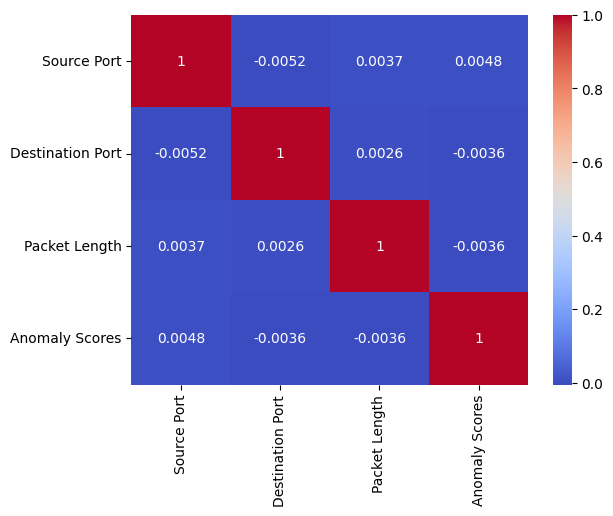

In [11]:
matriks_korelasi = df.corr()
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm')
plt.show()

#Identifikasi serangan yang paling umum dengan menganalisis variabel seperti Attack Type dan Attack Signature.

<ipython-input-12-b16d352cf68d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_counts.index, y=attack_counts, palette=colors)


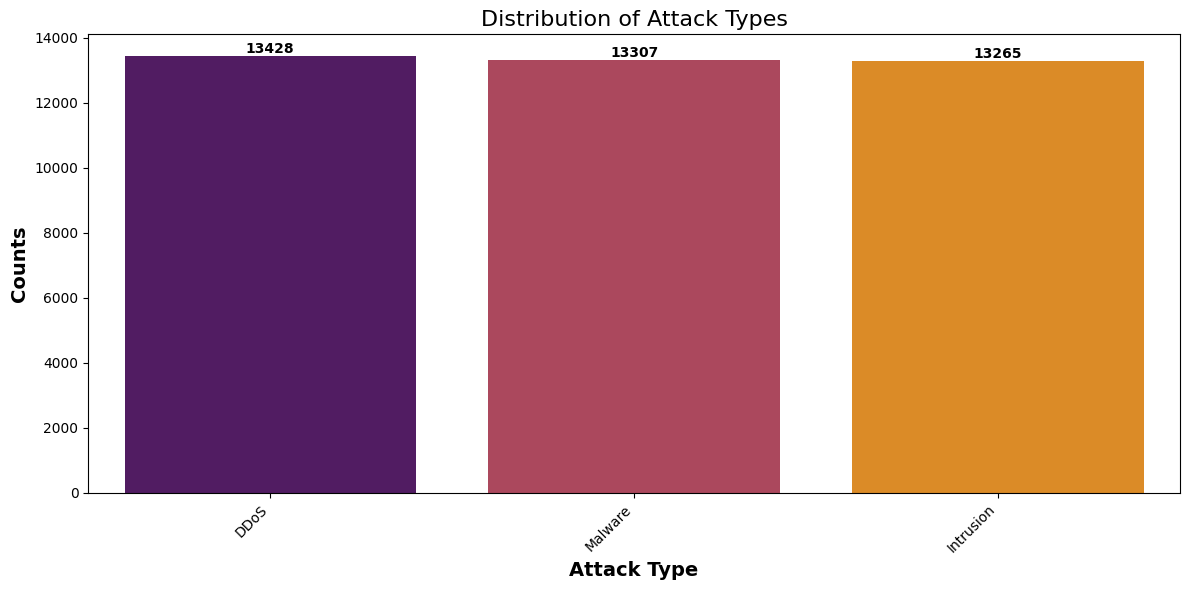

In [12]:
attack_counts = df['Attack Type'].value_counts()
colors = sns.color_palette('inferno', len(attack_counts))

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=attack_counts.index, y=attack_counts, palette=colors)

# Adding data labels
for i, count in enumerate(attack_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adding labels and title
plt.xlabel('Attack Type', fontsize=14, fontweight='bold')
plt.ylabel('Counts', fontsize=14, fontweight='bold')
plt.title('Distribution of Attack Types', fontsize=16)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


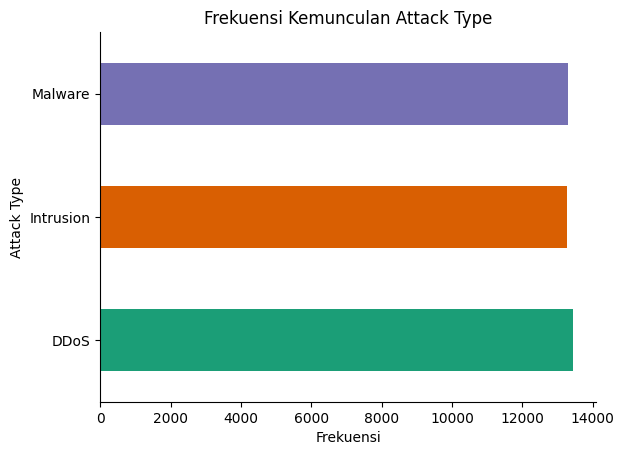

In [13]:
# Frekuensi Kemunculan Attack Type
df.groupby('Attack Type').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

plt.title('Frekuensi Kemunculan Attack Type')
plt.xlabel('Frekuensi')
plt.ylabel('Attack Type')

plt.show()

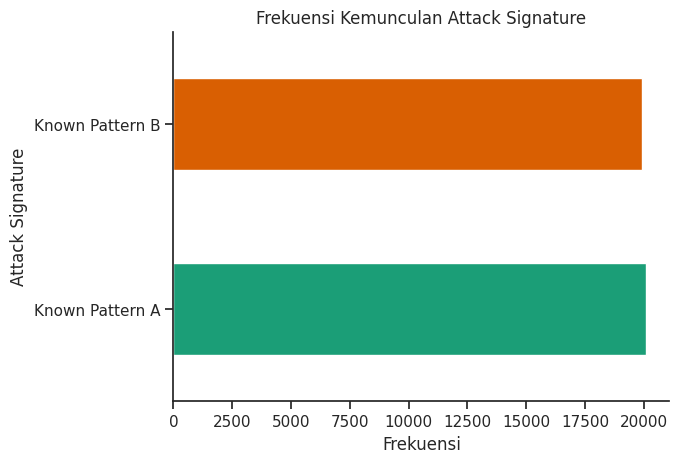

In [27]:
# Frekuensi Kemunculan Attack Signature
df.groupby('Attack Signature').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

plt.title('Frekuensi Kemunculan Attack Signature')
plt.xlabel('Frekuensi')
plt.ylabel('Attack Signature')

plt.show()

####Tren Frekuensi Attack Type per Tahun

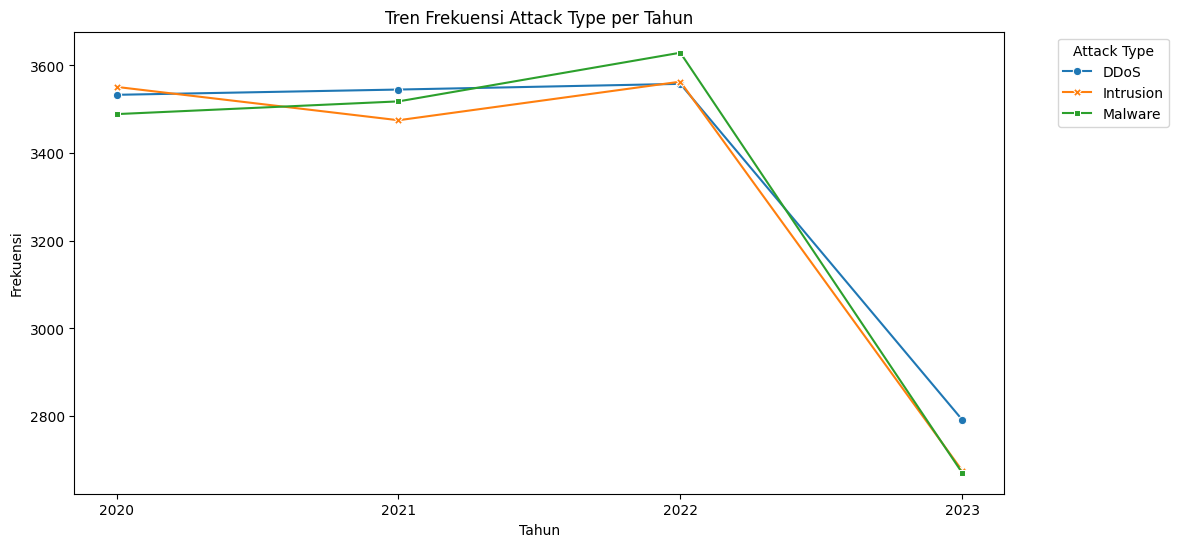

In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract year information from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year.astype(str)

# Hitung frekuensi Attack Type per tahun
attack_type_frequency = df.groupby(['Year', 'Attack Type']).size().unstack().fillna(0)

# Plotting line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=attack_type_frequency, markers=True, dashes=False)
plt.title('Tren Frekuensi Attack Type per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Frekuensi')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
# Attack Type paling umum
most_common_attack_type = df['Attack Type'].value_counts().idxmax()
print(f"Attack Type paling umum: {most_common_attack_type}")


Attack Type paling umum: DDoS


####Tren Frekuensi Attack Signature per Tahun

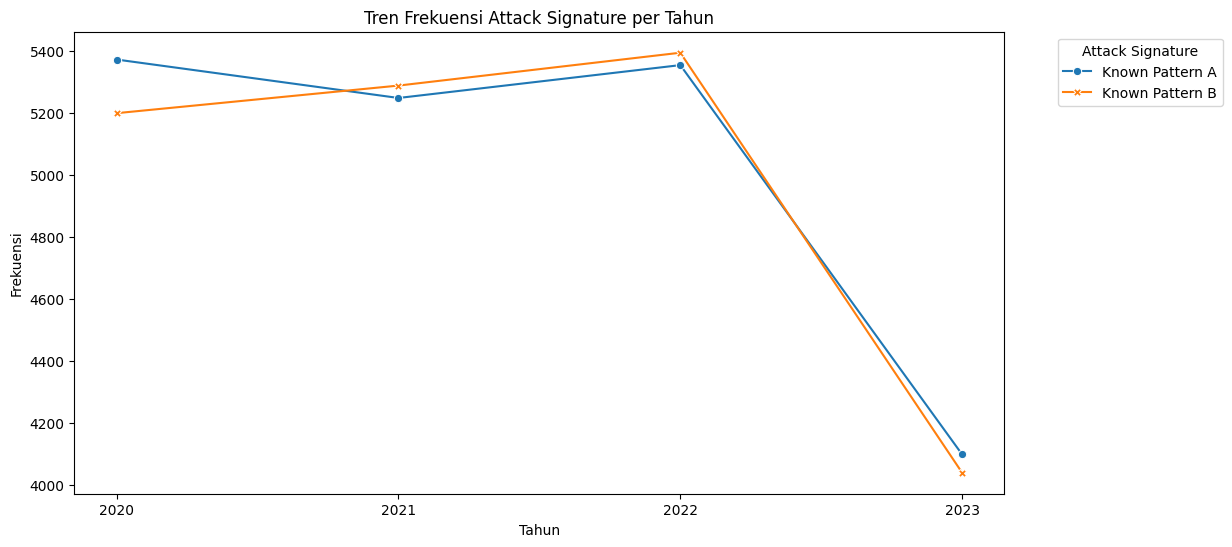

In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract year information from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year.astype(str)

# Hitung frekuensi Attack Signature per tahun
attack_type_frequency = df.groupby(['Year', 'Attack Signature']).size().unstack().fillna(0)

# Plotting line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=attack_type_frequency, markers=True, dashes=False)
plt.title('Tren Frekuensi Attack Signature per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Frekuensi')
plt.legend(title='Attack Signature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [18]:
# Attack Signature paling umum
most_common_attack_signature = df['Attack Signature'].value_counts().idxmax()
print(f"Attack Signature paling umum: {most_common_attack_signature}")

Attack Signature paling umum: Known Pattern A


###Evaluasi tingkat keparahan serangan dengan menganalisis Severity Level.

Analisis Frekuensi Tingkat Keparahan:

<ipython-input-20-1ef0724ae0fd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_counts.index, y=attack_counts, palette=colors)


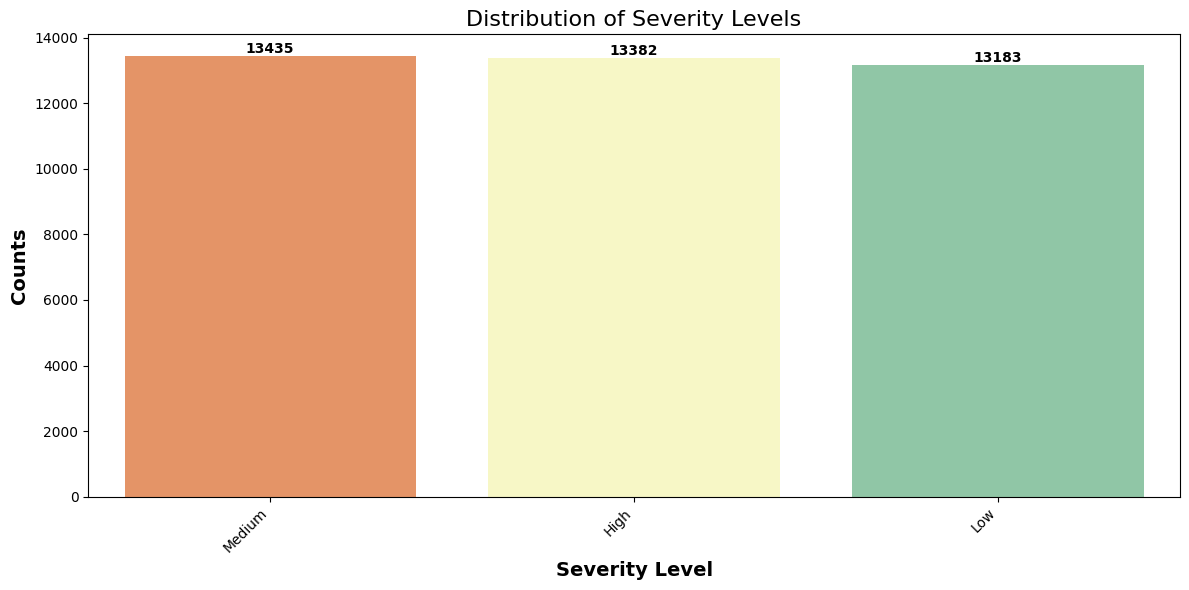

In [20]:
attack_counts = df['Severity Level'].value_counts()
colors = sns.color_palette('Spectral', len(attack_counts))

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=attack_counts.index, y=attack_counts, palette=colors)

# Adding data labels
for i, count in enumerate(attack_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adding labels and title
plt.xlabel('Severity Level', fontsize=14, fontweight='bold')
plt.ylabel('Counts', fontsize=14, fontweight='bold')
plt.title('Distribution of Severity Levels', fontsize=16)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [21]:
# Statistik deskriptif untuk tingkat keparahan
severity_statistics = df['Severity Level'].describe()
print(severity_statistics)

count      40000
unique         3
top       Medium
freq       13435
Name: Severity Level, dtype: object


In [22]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Severity Level'], df['Attack Type'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 1.797089107840153
P-value: 0.7730148764106086


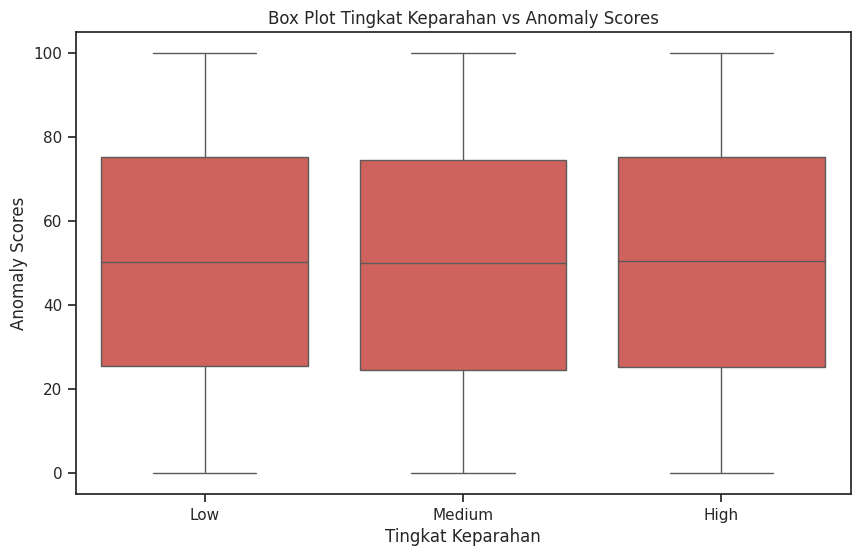

In [23]:
# Box plot untuk tingkat keparahan
plt.figure(figsize=(10, 6))
sns.set_theme(style="ticks", palette="Spectral")
sns.boxplot(x='Severity Level', y='Anomaly Scores', data=df)
plt.title('Box Plot Tingkat Keparahan vs Anomaly Scores')
plt.xlabel('Tingkat Keparahan')
plt.ylabel('Anomaly Scores')
plt.show()


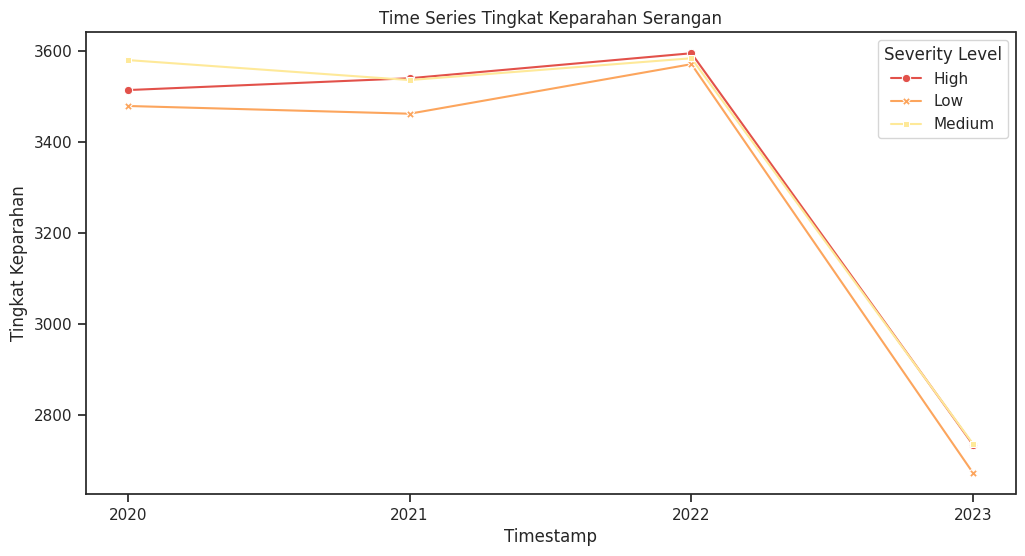

In [24]:
# Contoh: Time series plot untuk tingkat keparahan
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract year information from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year.astype(str)

# Hitung frekuensi Severity Level per tahun
severity_Level_frequency = df.groupby(['Year', 'Severity Level']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=severity_Level_frequency, markers=True, dashes=False)
plt.title('Time Series Tingkat Keparahan Serangan')
plt.xlabel('Timestamp')
plt.ylabel('Tingkat Keparahan')
plt.show()

In [25]:
# Severity Level paling tinggi
most_common_attack_type = df.groupby(['Year', 'Severity Level']).size().idxmax()
# df[['Year', 'Severity Level']]
print(f"Severity Level paling tinggi: {most_common_attack_type}")

Severity Level paling tinggi: ('2022', 'High')


#Analisis Anomali

<ipython-input-40-8a99c7728c18>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_attack_type = df[['Anomaly Scores', 'Attack Type']].corr()


                Anomaly Scores
Anomaly Scores             1.0


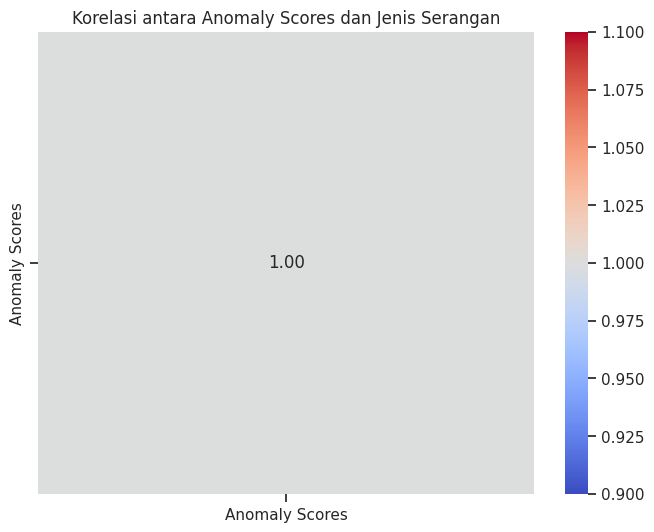

In [40]:
# Box plot untuk 'Anomaly Scores' berdasarkan 'Attack Type'

correlation_with_attack_type = df[['Anomaly Scores', 'Attack Type']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_attack_type, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Anomaly Scores dan Jenis Serangan')
plt.show()

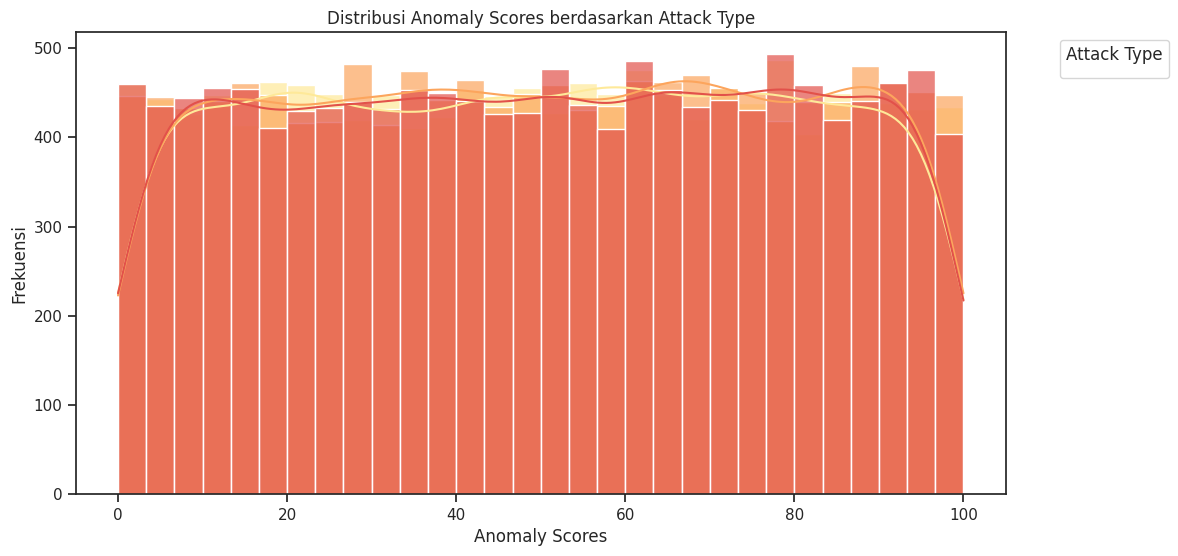

In [60]:
# Contoh: Jika Anomaly Scores dan Attack Type tersedia dalam DataFrame 'cybersecurity_data'
plt.figure(figsize=(12, 6))

# Memvisualisasikan distribusi Anomaly Scores
sns.histplot(data=df, x='Anomaly Scores', hue='Attack Type', bins=30, kde=True, alpha=0.7)

plt.title('Distribusi Anomaly Scores berdasarkan Attack Type')
plt.xlabel('Anomaly Scores')
plt.ylabel('Frekuensi')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-59-a2ccaf894954>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_counts.index, y=attack_counts, palette=colors)


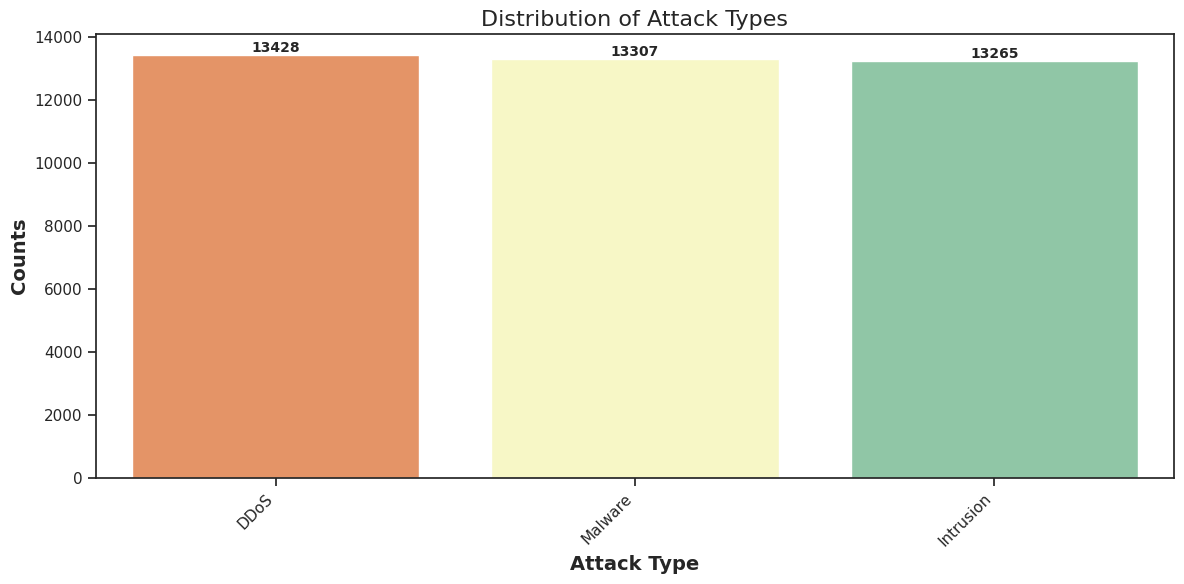

In [59]:
attack_counts = df['Attack Type'].value_counts()
colors = sns.color_palette('Spectral', len(attack_counts))

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=attack_counts.index, y=attack_counts, palette=colors)

# Adding data labels
for i, count in enumerate(attack_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adding labels and title
plt.xlabel('Attack Type', fontsize=14, fontweight='bold')
plt.ylabel('Counts', fontsize=14, fontweight='bold')
plt.title('Distribution of Attack Types', fontsize=16)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [69]:
from scipy.stats import kruskal

# Contoh: Jika 'Attack Type' dan 'Anomaly Scores' tersedia dalam DataFrame 'cybersecurity_data'
result = kruskal(*[group['Anomaly Scores'] for name, group in df.groupby('Attack Type')])

print("Hasil Uji Kruskal-Wallis:")
print(result)


Hasil Uji Kruskal-Wallis:
KruskalResult(statistic=0.5363858781671541, pvalue=0.764760214732675)


In [71]:
from scipy.stats import chi2_contingency

# Contoh: Jika 'Attack Type' dan 'Anomaly Scores' tersedia dalam DataFrame 'cybersecurity_data'
contingency_table = pd.crosstab(df['Attack Type'], df['Anomaly Scores'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")


Chi-squared value: 19666.10051363976
P-value: 0.46630685496153323
